In [1]:
! date

Tue Jul 21 13:14:05 CDT 2020


In [2]:
import sys
sys.path.append('/Users/jialei/Dropbox/Data/Projects/UTSW/Scripts/utilities')

import re
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.sparse

import matplotlib.pyplot as plt
from matplotlib import __version__ as mpl_version

import seaborn as sns

In [3]:
print(sys.version)
print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', mpl_version)
print('seaborn', sns.__version__)

3.8.2 (default, May 23 2020, 03:35:41) 
[Clang 11.0.3 (clang-1103.0.32.62)]
numpy 1.19.0
pandas 1.0.5
matplotlib 3.2.2
seaborn 0.10.1


In [4]:
# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.rcParams

params = {'pdf.fonttype': 42,
          'font.family': 'sans-serif',
          'font.sans-serif': 'Arial',
          'mathtext.default': 'regular',
          'figure.dpi': 96 * 1.5,
          'axes.axisbelow': True}
plt.rcParams.update(params)

%config InlineBackend.figure_format = 'retina'

In [5]:
import umap
import phate
from fast_tsne import fast_tsne

print('umap', umap.__version__)
print('phate', phate.__version__)

umap 0.4.6
phate 1.0.4


In [6]:
# sc.logging.print_versions()
import scanpy as sc
import harmonypy as hm

print('scanpy', sc.__version__)

scanpy 1.5.1


In [7]:
from utilities import (
    open_file,
    read_10x_matrix,
)

# Data loading

## Loading matrices

In [8]:
def load_10x_matrix(data_dir,
                    cell_id_prefix,
                    cells_included_file=None):

    matrix_dir = data_dir / cell_id_prefix / 'filtered_feature_bc_matrix'

    matrix_readcount_raw = read_10x_matrix(
        data_directory=matrix_dir,
        cell_id_prefix=cell_id_prefix,
        features_selected='Gene Expression',
    )

    # select cells
    if cells_included_file:

        cells_included_file = data_dir / cell_id_prefix / cells_included_file

        if cell_id_prefix:
            cells_included = [cell_id_prefix + '_' + i.rstrip().replace('-1', '')
                              for i in open(file=cells_included_file, mode='r')]

        else:
            cells_included = [i.rstrip().replace('-1', '')
                              for i in open(file=cells_included_file, mode='r')]

        cells_included_idx, = np.where(
            np.isin(
                element=matrix_readcount_raw['barcodes'],
                test_elements=cells_included
            )
        )

        matrix_readcount_raw['matrix'] = \
            matrix_readcount_raw['matrix'][:, cells_included_idx]
        matrix_readcount_raw['barcodes'] = \
            matrix_readcount_raw['barcodes'][cells_included_idx]

    return matrix_readcount_raw

In [9]:
DATA_DIR = Path('../../../../raw/public/PRJNA590042/')

In [10]:
matrix_readcount_SRR10480618_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480618',
    cells_included_file='scrublet/cells_singlet_zscore_0.2615472081423963_9924.txt'
)

matrix_readcount_SRR10480619_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480619',
    cells_included_file='scrublet/cells_singlet_zscore_0.14953131559262767_6731.txt'
)

matrix_readcount_SRR10480620_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480620',
    cells_included_file='scrublet/cells_singlet_zscore_0.2122883436324782_7924.txt'
)

In [11]:
matrix_readcount_SRR10480621_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480621',
    cells_included_file='scrublet/cells_singlet_zscore_0.19209298564488517_7185.txt'
)

matrix_readcount_SRR10480622_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480622',
    cells_included_file='scrublet/cells_singlet_zscore_0.24142494126450012_8058.txt'
)

matrix_readcount_SRR10480623_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480623',
    cells_included_file='scrublet/cells_singlet_zscore_0.204498508508924_8067.txt'
)

In [12]:
matrix_readcount_SRR10480624_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480624',
    cells_included_file='scrublet/cells_singlet_zscore_0.20978477336625417_7549.txt'
)

matrix_readcount_SRR10480625_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480625',
    cells_included_file='scrublet/cells_singlet_zscore_0.15640952419887_5104.txt'
)

matrix_readcount_SRR10480626_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480626',
    cells_included_file='scrublet/cells_singlet_zscore_0.2328860641666534_8543.txt'
)

In [13]:
matrix_readcount_SRR10480627_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480627',
    cells_included_file='scrublet/cells_singlet_zscore_0.17710722410188123_6877.txt'
)

matrix_readcount_SRR10480628_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480628',
    cells_included_file='scrublet/cells_singlet_zscore_0.2295345754903297_8009.txt'
)

matrix_readcount_SRR10480629_raw = load_10x_matrix(
    data_dir=DATA_DIR,
    cell_id_prefix='SRR10480629',
    cells_included_file='scrublet/cells_singlet_zscore_0.19330448619270987_6621.txt'
)

## Merging matrices

In [14]:
# merge
matrix_readcount_use = scipy.sparse.hstack(
    blocks=(
        matrix_readcount_SRR10480618_raw['matrix'],
        matrix_readcount_SRR10480619_raw['matrix'],
        matrix_readcount_SRR10480620_raw['matrix'],

        matrix_readcount_SRR10480621_raw['matrix'],
        matrix_readcount_SRR10480622_raw['matrix'],
        matrix_readcount_SRR10480623_raw['matrix'],

        matrix_readcount_SRR10480624_raw['matrix'],
        matrix_readcount_SRR10480625_raw['matrix'],
        matrix_readcount_SRR10480626_raw['matrix'],

        matrix_readcount_SRR10480627_raw['matrix'],
        matrix_readcount_SRR10480628_raw['matrix'],
        matrix_readcount_SRR10480629_raw['matrix']
    ),
    format=None, dtype=np.int).tocsc()

matrix_readcount_use_barcodes = np.concatenate(
    (
        matrix_readcount_SRR10480618_raw['barcodes'],
        matrix_readcount_SRR10480619_raw['barcodes'],
        matrix_readcount_SRR10480620_raw['barcodes'],

        matrix_readcount_SRR10480621_raw['barcodes'],
        matrix_readcount_SRR10480622_raw['barcodes'],
        matrix_readcount_SRR10480623_raw['barcodes'],

        matrix_readcount_SRR10480624_raw['barcodes'],
        matrix_readcount_SRR10480625_raw['barcodes'],
        matrix_readcount_SRR10480626_raw['barcodes'],

        matrix_readcount_SRR10480627_raw['barcodes'],
        matrix_readcount_SRR10480628_raw['barcodes'],
        matrix_readcount_SRR10480629_raw['barcodes']
    ), axis=0)

matrix_readcount_use = \
    matrix_readcount_use[:, np.argsort(a=matrix_readcount_use_barcodes)]
matrix_readcount_use_barcodes = matrix_readcount_use_barcodes[np.argsort(
    a=matrix_readcount_use_barcodes)]

matrix_readcount_use

<27998x90592 sparse matrix of type '<class 'numpy.int64'>'
	with 280297797 stored elements in Compressed Sparse Column format>

In [15]:
matrix_readcount_use_features = matrix_readcount_SRR10480618_raw['features']
sum(matrix_readcount_SRR10480618_raw['features'] ==
    matrix_readcount_SRR10480619_raw['features'])

27998

## Saving matrix

In [16]:
Path('raw').mkdir(parents=True, exist_ok=True)

if not Path('raw/matrix_readcount.npz').is_file():
    scipy.sparse.save_npz(
        file='raw/matrix_readcount.npz',
        matrix=matrix_readcount_use,
        compressed=True
    )

if not Path('raw/matrix_readcount_barcodes.npy').is_file():
    np.save(
        file='raw/matrix_readcount_barcodes.npy',
        arr=matrix_readcount_use_barcodes.astype(dtype=np.unicode_),
        allow_pickle=False
    )

if not Path('raw/matrix_readcount_features.npy').is_file():
    np.save(
        file='raw/matrix_readcount_features.npy',
        arr=matrix_readcount_use_features.astype(dtype=np.unicode_),
        allow_pickle=False
    )

# Preprocessing

## Reloading merged matrix

In [17]:
DATA_DIR = Path('raw')

In [18]:
matrix_readcount_use = scipy.sparse.load_npz(
    file=DATA_DIR / 'matrix_readcount.npz')

matrix_readcount_use_barcodes = np.load(
    file=DATA_DIR / 'matrix_readcount_barcodes.npy')

matrix_readcount_use_features = np.load(
    file=DATA_DIR / 'matrix_readcount_features.npy')

In [19]:
matrix_readcount_use

<27998x90592 sparse matrix of type '<class 'numpy.int64'>'
	with 280297797 stored elements in Compressed Sparse Column format>

## MT UMI distribution

In [20]:
# create anndata object
adata = sc.AnnData(X=matrix_readcount_use.astype(dtype=np.int).T,
                   obs={'cell': matrix_readcount_use_barcodes,
                        'batch': [re.sub('_[A-Z]{16}$', '', i)
                                  for i in matrix_readcount_use_barcodes]},
                   var={'feature': matrix_readcount_use_features})

adata.obs.index = adata.obs['cell']
adata.var.index = adata.var['feature']

adata

AnnData object with n_obs × n_vars = 90592 × 27998
    obs: 'cell', 'batch'
    var: 'feature'

In [21]:
adata.var['symbol'] = [re.sub('^E[A-Z]{1,}[0-9]{11}_', '', i)
                       for i in adata.var['feature']]
adata.var.head()

,feature,symbol
feature,,
ENSMUSG00000051951_Xkr4,ENSMUSG00000051951_Xkr4,Xkr4
ENSMUSG00000089699_Gm1992,ENSMUSG00000089699_Gm1992,Gm1992
ENSMUSG00000102343_Gm37381,ENSMUSG00000102343_Gm37381,Gm37381
ENSMUSG00000025900_Rp1,ENSMUSG00000025900_Rp1,Rp1
ENSMUSG00000109048_Rp1,ENSMUSG00000109048_Rp1,Rp1


In [22]:
adata.obs['num_umis'] = adata.X.sum(axis=1).A1.astype(dtype=np.int)
adata.obs['num_features'] = (adata.X > 0).sum(axis=1).A1
adata.obs['num_umis_mt'] = adata[:, [i.upper().startswith('MT-')
                                     for i in adata.var.symbol]].X.sum(axis=1).A1.astype(dtype=np.int)
adata.obs.head()

,cell,batch,num_umis,num_features,num_umis_mt
cell,,,,,
SRR10480618_AAACCTGAGAATGTGT,SRR10480618_AAACCTGAGAATGTGT,SRR10480618,16741,4690,9
SRR10480618_AAACCTGAGATATGGT,SRR10480618_AAACCTGAGATATGGT,SRR10480618,8125,3295,2
SRR10480618_AAACCTGAGATCCCAT,SRR10480618_AAACCTGAGATCCCAT,SRR10480618,960,680,1
SRR10480618_AAACCTGAGATGTGGC,SRR10480618_AAACCTGAGATGTGGC,SRR10480618,7263,3174,1
SRR10480618_AAACCTGAGCAATCTC,SRR10480618_AAACCTGAGCAATCTC,SRR10480618,52901,7332,11


Text(0, 0.5, 'Number of cells')

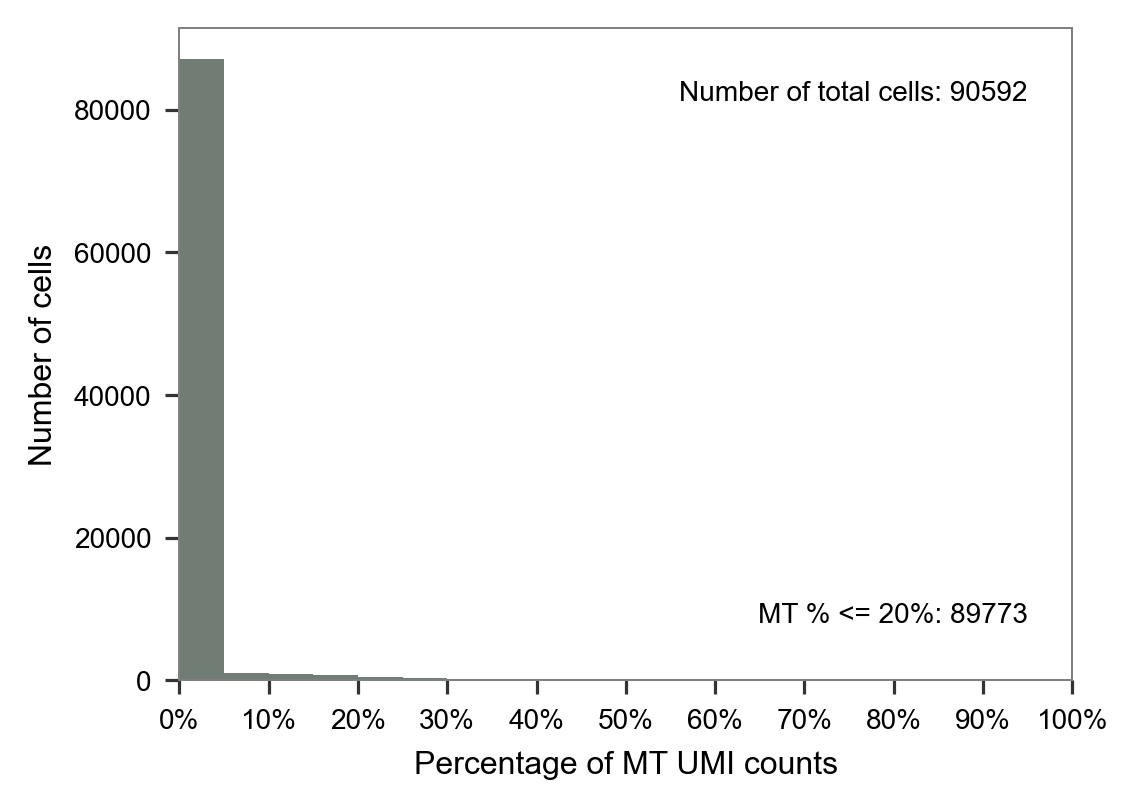

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4 * 1, 3 * 1))

ax.hist(
    x=(adata.obs.num_umis_mt / adata.obs.num_umis),
    bins=np.arange(start=0, stop=1, step=0.05),
    color='#707C74'
)

ax.set_xlim(left=0, right=1)

ax.tick_params(
    axis='both',
    which='major',
    direction='out',
    width=0.8,
    labelsize=7,
    labelcolor='black',
    colors='#333333'
)

ax.set_xticks(
    ticks=[i / 10 for i in np.linspace(start=0, stop=10, num=11, endpoint=True)])
ax.set_xticklabels(labels=['{:,.0%}'.format(i) for i in ax.get_xticks()])

for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(b=True)
    ax.spines[i].set_linewidth(w=0.5)
    ax.spines[i].set_color(c='grey')

ax.text(
    x=0.95,
    y=0.9,
    s=f'Number of total cells: {adata.n_obs}',
    fontsize=7,
    horizontalalignment='right',
    verticalalignment='center',
    transform=ax.transAxes
)
# ax.set_title(label=f'Number of total cells: {adata.n_obs}', fontsize=8, loc='right')

ax.text(
    x=0.95,
    y=0.1,
    s=f'MT % <= 20%: {sum((adata.obs.num_umis_mt / adata.obs.num_umis) <= 0.2)}',
    fontsize=7,
    horizontalalignment='right',
    verticalalignment='center',
    transform=ax.transAxes
)

ax.set_xlabel('Percentage of MT UMI counts', fontsize=8)
ax.set_ylabel('Number of cells', fontsize=8)

In [24]:
file_name = 'Pyplot_barplot_umis_mt_percentage.pdf'

if not Path(file_name).is_file():
    fig.savefig(fname=file_name, transparent=True, bbox_inches='tight')

In [25]:
sum(adata.obs['num_umis_mt'] / adata.obs['num_umis'] <= 0.2)

89773

In [26]:
adata[adata.obs['num_umis_mt'] / adata.obs['num_umis'] <= 0.2, :]

View of AnnData object with n_obs × n_vars = 89773 × 27998
    obs: 'cell', 'batch', 'num_umis', 'num_features', 'num_umis_mt'
    var: 'feature', 'symbol'

In [27]:
adata.obs['batch'].value_counts()

SRR10480618    9924
SRR10480626    8543
SRR10480623    8067
SRR10480622    8058
SRR10480628    8009
SRR10480620    7924
SRR10480624    7549
SRR10480621    7185
SRR10480627    6877
SRR10480619    6731
SRR10480629    6621
SRR10480625    5104
Name: batch, dtype: int64

In [28]:
adata.obs.loc[adata.obs['num_umis_mt'] /
              adata.obs['num_umis'] <= 0.2, 'batch'].value_counts()

SRR10480618    9874
SRR10480626    8482
SRR10480622    8044
SRR10480623    7994
SRR10480628    7915
SRR10480620    7894
SRR10480624    7534
SRR10480621    6989
SRR10480627    6852
SRR10480619    6662
SRR10480629    6468
SRR10480625    5065
Name: batch, dtype: int64

## Saving filtered matrix

In [29]:
if not Path('matrix_readcount.npz').is_file():
    scipy.sparse.save_npz(
        file='matrix_readcount.npz',
        matrix=adata[adata.obs['num_umis_mt'] /
                     adata.obs['num_umis'] <= 0.2, :].X.T.astype(dtype=np.int_),
        compressed=True
    )

if not Path('matrix_readcount_barcodes.npy').is_file():
    np.save(
        file='matrix_readcount_barcodes.npy',
        arr=adata[adata.obs['num_umis_mt'] / adata.obs['num_umis']
                  <= 0.2, :].obs.index.values.astype(dtype=np.unicode_),
        allow_pickle=False
    )

if not Path('matrix_readcount_features.npy').is_file():
    np.save(
        file='matrix_readcount_features.npy',
        arr=adata[adata.obs['num_umis_mt'] / adata.obs['num_umis']
                  <= 0.2, :].var.index.values.astype(dtype=np.unicode_),
        allow_pickle=False
    )

# Checking

In [30]:
DATA_DIR = Path('.')

In [31]:
matrix_readcount_use = scipy.sparse.load_npz(
    file=DATA_DIR / 'matrix_readcount.npz')

matrix_readcount_use_barcodes = np.load(
    file=DATA_DIR / 'matrix_readcount_barcodes.npy')

matrix_readcount_use_features = np.load(
    file=DATA_DIR / 'matrix_readcount_features.npy')

In [32]:
assert matrix_readcount_use.shape == (
    len(matrix_readcount_use_features),
    len(matrix_readcount_use_barcodes),
)

In [33]:
matrix_readcount_use.shape, (
    len(matrix_readcount_use_features),
    len(matrix_readcount_use_barcodes),
)

((27998, 89773), (27998, 89773))

In [34]:
pd.Series(
    [re.sub('_[A-Z]{16}$', '', i) for i in matrix_readcount_use_barcodes]
).value_counts().sort_index()

SRR10480618    9874
SRR10480619    6662
SRR10480620    7894
SRR10480621    6989
SRR10480622    8044
SRR10480623    7994
SRR10480624    7534
SRR10480625    5065
SRR10480626    8482
SRR10480627    6852
SRR10480628    7915
SRR10480629    6468
dtype: int64